In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import math

C:\Users\lolab\Anaconda3\envs\env_thesis_bob\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


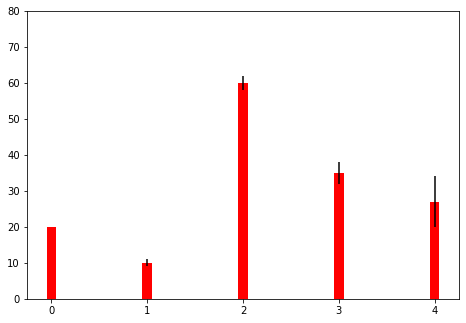

In [36]:
N = 5
menMeans = (20, 10, 60, 35, 27)
width = 0.10
ind = [0, 1, 2, 3, 4]
std = [0, 1,2,3,7]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, menMeans, width, color='r', yerr= std)

ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_yticks(np.arange(0, 81, 10))

plt.show()

# histogram which gives a overview how many images fall in each 1000 class

No handles with labels found to put in legend.


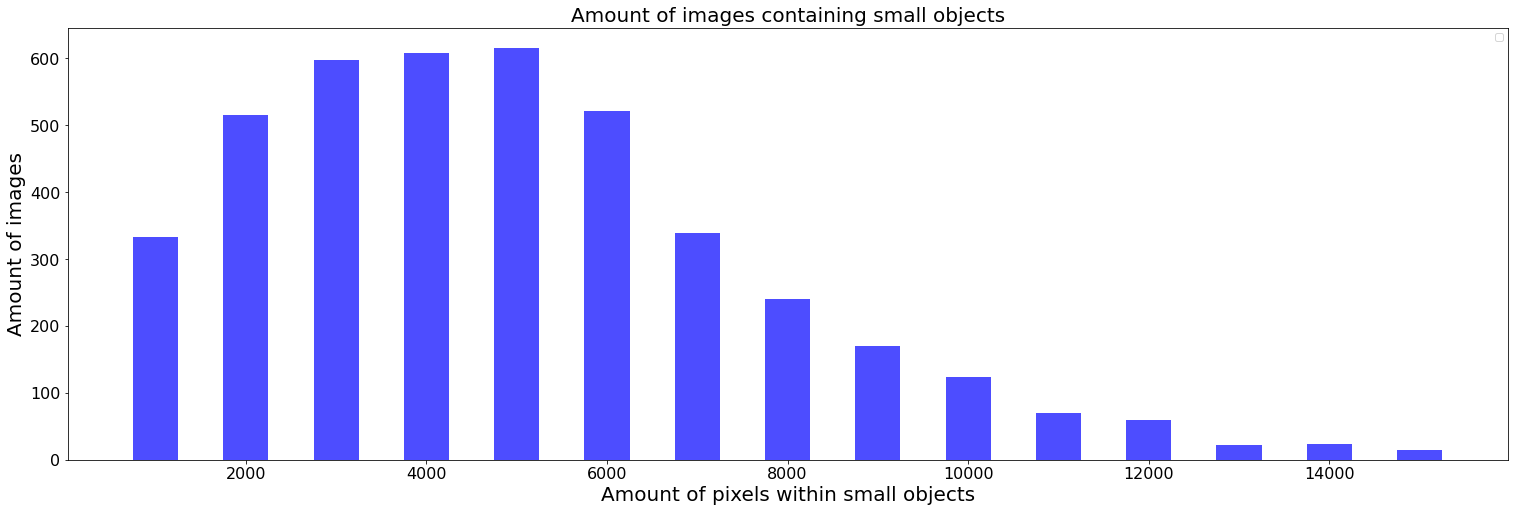

In [5]:
count_nr = 1000

count_dict = {}
with open('validation_all/' + 'experiment_26_weights_5_batch_idx9999' + '.pkl', 'rb') as f:
    exp_20_epoch_3 = pickle.load(f)
    
exp_20_epoch_3 = dict(sorted(exp_20_epoch_3.items()))
    
for key, value in exp_20_epoch_3.items():

    count = len(value["loss"])
    place_in_dict = int(math.ceil(key / 1000.0)) * 1000
    
    if place_in_dict == 0 or place_in_dict > 15000:
        continue
    
    if place_in_dict not in count_dict:
        count_dict[place_in_dict] = count
    else:

        count_dict[place_in_dict] += count

fig = plt.figure(figsize =(20, 6))

ax = fig.add_axes([0,0,1,1])

width = 500

ax.bar(count_dict.keys(), count_dict.values(), width, color= '#4d4dff')

plt.legend()
plt.title('Amount of images containing small objects', fontsize=20)
plt.ylabel('Amount of images', fontsize=20)
plt.xlabel('Amount of pixels within small objects', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.show()

In [6]:
with open('validation_all/' + 'experiment_13_weights_5_batch_idx9999' + '.pkl', 'rb') as f:
    exp_13_epoch_5 = pickle.load(f) 
with open('validation_all/' + 'experiment_14_weights_5_batch_idx9999' + '.pkl', 'rb') as f:
    exp_14_epoch_5 = pickle.load(f) 
with open('validation_all/' + 'experiment_20_weights_5_batch_idx9999' + '.pkl', 'rb') as f:
    exp_20_epoch_5 = pickle.load(f) 
    
with open('validation_all/' + 'experiment_18_weights_5_batch_idx9999' + '.pkl', 'rb') as f:
    exp_18_epoch_5 = pickle.load(f)     
with open('validation_all/' + 'experiment_21_weights_5_batch_idx9999' + '.pkl', 'rb') as f:
    exp_21_epoch_5 = pickle.load(f)
with open('validation_all/' + 'experiment_26_weights_5_batch_idx9999' + '.pkl', 'rb') as f:
    exp_26_epoch_5 = pickle.load(f)
    
with open('validation_all/' + 'experiment_22_weights_5_batch_idx9999' + '.pkl', 'rb') as f:
    exp_22_epoch_5 = pickle.load(f)
with open('validation_all/' + 'experiment_27_weights_5_batch_idx9999' + '.pkl', 'rb') as f:
    exp_27_epoch_5 = pickle.load(f)
with open('validation_all/' + 'experiment_28_weights_5_batch_idx9999' + '.pkl', 'rb') as f:
    exp_28_epoch_5 = pickle.load(f)
    
exp_13_epoch_5 = dict(sorted(exp_13_epoch_5.items()))
exp_14_epoch_5 = dict(sorted(exp_14_epoch_5.items()))
exp_20_epoch_5 = dict(sorted(exp_20_epoch_5.items()))

exp_18_epoch_5 = dict(sorted(exp_18_epoch_5.items()))
exp_21_epoch_5 = dict(sorted(exp_21_epoch_5.items()))
exp_26_epoch_5 = dict(sorted(exp_26_epoch_5.items()))

exp_22_epoch_5 = dict(sorted(exp_22_epoch_5.items()))
exp_27_epoch_5 = dict(sorted(exp_27_epoch_5.items()))
exp_28_epoch_5 = dict(sorted(exp_28_epoch_5.items()))

In [46]:
test = [   [2, 2,2 ],   [4,4,4],   [6,6,6], [8,8,8] ]


 

3.0
3.0
3.0


C:\Users\lolab\Anaconda3\envs\env_thesis_bob\lib\site-packages\ipykernel_launcher.py:26: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
No handles with labels found to put in legend.


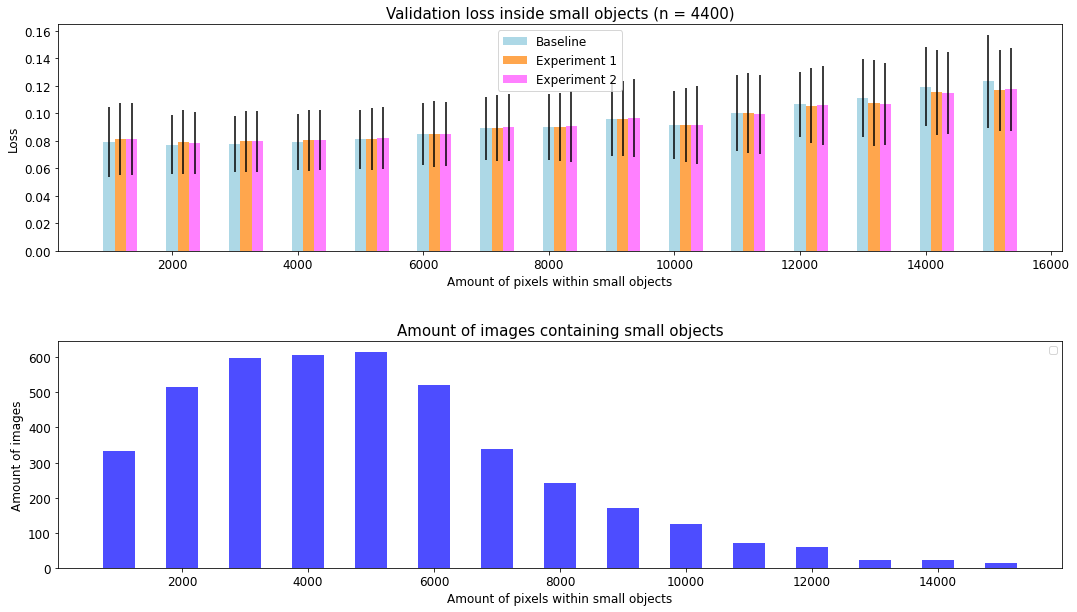

In [10]:
loss_curve = 'loss'

# load_pkl = 'experiment_20_weights_5_batch_idx9999'

data_20 = []
data_21 = []
data_22 = []

count_nr = 1000
x_axis_data = []


baseline  = [exp_13_epoch_5, exp_14_epoch_5, exp_20_epoch_5]
exp_1 = [exp_18_epoch_5, exp_21_epoch_5, exp_26_epoch_5]
exp_2 = [exp_22_epoch_5, exp_27_epoch_5, exp_28_epoch_5]

data_lists = [baseline, exp_1, exp_2]
end_data_per_exp_mean = []
end_data_per_exp_std = []

end_data_mean = []
end_data_std = []
end_data_x_axis = []

for experiment in data_lists:
    for run in experiment:
 
        x_axis = []
        y_axis_mean = []
        y_axis_std = []
        count = count_nr
        current_list = []
        check = []

        for key, value in run.items():
            
#             print(key, value)
#             sdf

            # make lists per 1000
            if key <= count:
                check.append(key)

                for number in value[loss_curve]:
                    if number >0:
                        current_list.append(number)

            # if new masks size is greater then the 1000 you currently use
            else:

                # only append if list is not empty
                if len(check) >10:
                    x_axis.append(count)
                    y_axis_mean.append(np.average(np.array(current_list)))
                    y_axis_std.append(np.std(np.array(current_list)))

                count += count_nr
                current_list = []
                check = []
                
                check.append(key)
                for number in value[loss_curve]:
                    if number > 0:
                        current_list.append(number)

        end_data_per_exp_mean.append(y_axis_mean)
        end_data_per_exp_std.append(y_axis_std)

    curr = []
    for x, y, z in zip(end_data_per_exp_mean[0], end_data_per_exp_mean[1], end_data_per_exp_mean[2]):
        curr.append( (x + y + z) / 3 )
    end_data_mean.append(curr)
     
    curr = []
    for k, l, m in zip(end_data_per_exp_std[0], end_data_per_exp_std[1], end_data_per_exp_std[2]):
        curr.append( (k + l + m) / 3 )
    end_data_std.append(curr)
    
    end_data_per_exp_mean = []
    end_data_per_exp_std = []
    
end_data_x_axis.append(x_axis)


plot(end_data_mean[0], end_data_mean[1], end_data_mean[2], end_data_std[0], end_data_std[1], end_data_std[2], end_data_x_axis[0], 'Validation loss inside small objects (n = 4400)')

In [8]:
def plot(baseline_mean, exp_1_mean, exp_2_mean, baseline_std, exp_1_std, exp_2_std, x_axis_data, fig_title):

#     fig = plt.figure(figsize =(20, 6))
    fig, axs = plt.subplots(2, 1, figsize = (18, 10), constrained_layout=True)

#     axs = fig.add_axes([0,0,1,1])
    
    width = 180
    r2 = [x + width for x in x_axis_data]
    r3 = [x + width *2 for x in x_axis_data]

    axs[0].bar(x_axis_data, baseline_mean, width, color= 'lightblue' , label = 'Baseline', yerr = baseline_std)
    axs[0].bar(r2, exp_1_mean, width, color= '#ffa64d', label = 'Experiment 1', yerr = exp_1_std)
    axs[0].bar(r3, exp_2_mean, width, color= '#ff80ff', label = 'Experiment 2', yerr = exp_2_std)
    
    axs[0].set_title(f'{fig_title}', fontsize = 15)
    axs[0].legend(loc = "upper center", fontsize=12)

    
    for ax in axs.flat:
        ax.set(xlabel='Amount of pixels within small objects', ylabel='Loss')

        ax.xaxis.get_label().set_fontsize(12)
        ax.yaxis.get_label().set_fontsize(12)
    
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.4)
# 
    axs[0].tick_params(axis='both', which='major', labelsize=12)

# ------------------------ bar plot -------------------------------------------
    count_nr = 1000

    count_dict = {}
    with open('validation_all/' + 'experiment_26_weights_5_batch_idx9999' + '.pkl', 'rb') as f:
        exp_20_epoch_3 = pickle.load(f)

    exp_20_epoch_3 = dict(sorted(exp_20_epoch_3.items()))

    for key, value in exp_20_epoch_3.items():

        count = len(value["loss"])
        place_in_dict = int(math.ceil(key / 1000.0)) * 1000

        if place_in_dict == 0 or place_in_dict > 15000:
            continue

        if place_in_dict not in count_dict:
            count_dict[place_in_dict] = count
        else:

            count_dict[place_in_dict] += count


    width = 500

    axs[1].bar(count_dict.keys(), count_dict.values(), width, color= '#4d4dff')

    plt.legend()
    plt.title('Amount of images containing small objects', fontsize=15)
    plt.ylabel('Amount of images', fontsize=12)
    plt.xlabel('Amount of pixels within small objects', fontsize=12)
#     ax.tick_params(axis='both', which='major', labelsize=16)
    axs[1].tick_params(axis='both', which='major', labelsize=12)
    
    plt.show()
 

In [8]:
loss_curve = 'loss_within_attention_mask'

load_pkl = 'experiment_20_weights_5_batch_idx9999'

data_20 = []
data_21 = []
data_22 = []

count_nr = 1000

all_data_lists = [data_20, data_21, data_22]

x_axis_data = []

with open('validation_all/' + 'test_experiment_20_weights_5_batch_idx9999' + '.pkl', 'rb') as f:
    exp_20_epoch_3 = pickle.load(f)
    
with open('validation_all/' + 'test_experiment_21_weights_5_batch_idx9999' + '.pkl', 'rb') as f:
    exp_21_epoch_3 = pickle.load(f)

with open('validation_all/' + 'test_experiment_22_weights_5_batch_idx9999' + '.pkl', 'rb') as f:
    exp_22_epoch_3 = pickle.load(f)

# sort by keys
exp_20_epoch_3 = dict(sorted(exp_20_epoch_3.items()))
exp_21_epoch_3 = dict(sorted(exp_21_epoch_3.items()))
exp_22_epoch_3 = dict(sorted(exp_22_epoch_3.items()))

data_lists = [exp_20_epoch_3, exp_21_epoch_3, exp_22_epoch_3]
end_data = []

for data_list in data_lists:
    
    x_axis = []
    y_axis_mean = []
    y_axis_std = []
    count = count_nr
    current_list = []
    check = []

    for key, value in data_list.items():
    
        # make lists per 1000
        if key <= count:
            check.append(key)
            current_list.append(value[loss_curve][0])

        # if new masks size is greater then the 1000 you currently use
        else:

            # only append if list is not empty
            if len(check) >10:
                x_axis.append(count)
                y_axis_mean.append(np.average(np.array(current_list)))
                y_axis_std.append(np.std(np.array(current_list)))

            count += count_nr
            current_list = []
            check = []
    
    
    end_data.append(y_axis_mean)
    end_data.append(y_axis_std)
end_data.append(x_axis)


plot(end_data[0], end_data[1], end_data[2], end_data[3], end_data[4], end_data[5], end_data[6], 'Test loss inside small objects (n = 700)')
    
# plot(data_20, data_21, data_22, update_x_axis, 'Test loss inside small objects (n = 700)')

FileNotFoundError: [Errno 2] No such file or directory: 'validation_all/test_experiment_20_weights_5_batch_idx9999.pkl'